In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

In [48]:
np.random.seed(1)

In [49]:
# read data
der = np.loadtxt('derivatives_all_epochs.dat')
# define the number of features
ncol = der.shape[1]
#scaling 
train_scaled = minmax_scale(der, axis = 0)

In [50]:
### Define the encoder dimension
encoding_dim = 4
#introducing an activation function
activation = 'relu'

In [51]:
train_scaled.shape

(3677, 296)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(train_scaled, train_scaled, train_size = 0.96, random_state = 1)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size = 0.96, random_state = 1)

In [53]:
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(250, activation = activation)(input_dim)
encoded2 = Dense(150, activation = activation)(encoded1)
encoded3 = Dense(120, activation = activation)(encoded2)
encoded4 = Dense(100, activation = activation)(encoded3)
encoded5 = Dense(70, activation = activation)(encoded4)
encoded6 = Dense(50, activation = activation)(encoded5)
encoded7 = Dense(35, activation = activation)(encoded6)
encoded8 = Dense(24, activation = activation)(encoded7)
encoded9 = Dense(8, activation = activation)(encoded8)
encoded_middle = Dense(encoding_dim, activation = 'sigmoid')(encoded9)

# Decoder Layers
decoded0 = Dense(8, activation = activation)(encoded_middle)
decoded1 = Dense(24, activation = activation)(decoded0)
decoded2 = Dense(35, activation = activation)(decoded1)
decoded3 = Dense(50, activation = activation)(decoded2)
decoded4 = Dense(70, activation = activation)(decoded3)
decoded5 = Dense(100, activation = activation)(decoded4)
decoded6 = Dense(120, activation = activation)(decoded5)
decoded7 = Dense(150, activation = activation)(decoded6)
decoded8 = Dense(250, activation = activation)(decoded7)
decoded_out = Dense(ncol, activation = 'sigmoid')(decoded8)

# this model maps an input to its reconstruction
autoencoder = Model(inputs = input_dim, outputs = decoded_out)

# this model maps an input to its encoded representation
middle  = Model(inputs =input_dim, outputs = encoded_middle)

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

middle.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics=['accuracy'])

In [54]:
#summary of the data

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 296)               0         
_________________________________________________________________
dense_61 (Dense)             (None, 250)               74250     
_________________________________________________________________
dense_62 (Dense)             (None, 150)               37650     
_________________________________________________________________
dense_63 (Dense)             (None, 120)               18120     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_65 (Dense)             (None, 70)                7070      
_________________________________________________________________
dense_66 (Dense)             (None, 50)                3550      
__________

In [55]:
from keras.callbacks import TensorBoard

history = autoencoder.fit(X_train, X_train, nb_epoch = 100, validation_data = (X_val, X_val), 
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder', histogram_freq=0, write_graph=False)])


/usr/lib/python3/dist-packages/ipykernel/__main__.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 3387 samples, validate on 142 samples
Epoch 1/100
3387/3387 [==============================] - 3s 991us/step - loss: 0.6907 - acc: 2.7929e-04 - val_loss: 0.6879 - val_acc: 1.4275e-04
Epoch 2/100
3387/3387 [==============================] - 3s 1ms/step - loss: 0.6841 - acc: 2.7629e-04 - val_loss: 0.6787 - val_acc: 1.6654e-04
Epoch 3/100
3387/3387 [==============================] - 3s 987us/step - loss: 0.6750 - acc: 2.6333e-04 - val_loss: 0.6727 - val_acc: 1.6654e-04
Epoch 4/100
3387/3387 [==============================] - 3s 891us/step - loss: 0.6727 - acc: 2.7031e-04 - val_loss: 0.6723 - val_acc: 1.9033e-04
Epoch 5/100
3387/3387 [==============================] - 3s 806us/step - loss: 0.6726 - acc: 2.6832e-04 - val_loss: 0.6722 - val_acc: 1.9033e-04
Epoch 6/100
3387/3387 [==============================] - 2s 727us/step - loss: 0.6726 - acc: 2.6732e-04 - val_loss: 0.6722 - val_acc: 1.9033e-04
Epoch 7/100
3387/3387 [==============================] - 3s 794us/step - loss: 0.6725

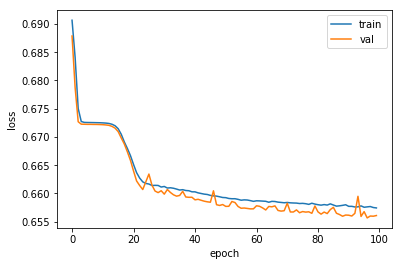

In [56]:
import matplotlib.pyplot as plt
# plot epoch versus loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

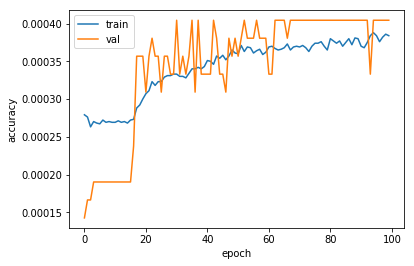

In [57]:
import matplotlib.pyplot as plt
# plot epoch versus accuracy
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [58]:
#reduced data and its shape 

reduced_data150D=middle.predict(X_test)
print(reduced_data150D.shape,reduced_data150D)

(148, 4) [[0.46153048 0.5168272  0.48290652 0.49364033]
 [0.6426843  0.00789961 0.99999166 0.9999968 ]
 [0.36510345 0.21340877 0.97050357 0.9822297 ]
 [0.42836884 0.37272012 0.8087345  0.8422807 ]
 [0.48240888 0.02386365 0.9999008  0.99996054]
 [0.70228547 0.16400589 0.9841345  0.9855439 ]
 [0.44473648 0.39129844 0.77172965 0.8035127 ]
 [0.49111158 0.48879728 0.53886706 0.54551053]
 [0.4190571  0.3603451  0.83064866 0.8641798 ]
 [0.49978915 0.4819424  0.55184317 0.55696446]
 [0.3830665  0.23770496 0.9575509  0.9727041 ]
 [0.49877995 0.48313716 0.54936415 0.5545694 ]
 [0.4856636  0.49178207 0.53394085 0.5418525 ]
 [0.46060175 0.03693781 0.99971014 0.99987555]
 [0.5325094  0.15316126 0.985515   0.9899317 ]
 [0.47975647 0.4047483  0.7344124  0.75814915]
 [0.48078203 0.41292843 0.71743757 0.7403081 ]
 [0.53970575 0.38130096 0.78601134 0.79680675]
 [0.38732043 0.05853651 0.9991648  0.9996389 ]
 [0.46333787 0.5128929  0.49181205 0.5028378 ]
 [0.44938198 0.34761518 0.8419613  0.87006634]
 [0.

In [ ]:
#recontracted data and its shape
reconstructed150 = autoencoder.predict(X_test)

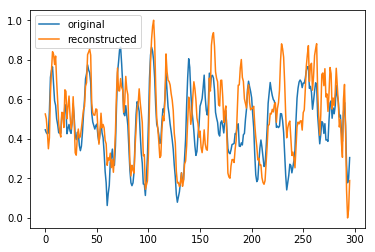

In [ ]:
plt.plot(train_scaled[0,:],label='original')
plt.plot(minmax_scale(reconstructed150[0,:], axis=0),label='reconstructed')
plt.legend()
plt.show()